# <div align="center">Getting Started With TensorFlow</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)


In [4]:
import tensorflow as tf
print('tf version: ', tf.__version__)

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Initialize Session and run `result`
with tf.Session() as sess:
    output = sess.run(result)
    print(output)

tf version:  1.14.0
[ 5 12 21 32]


In the code chunks above we have just defined a default Session, but it’s also good to know that you can pass in options as well. You can, for example, specify the ***config*** argument and then use the ***ConfigProto protocol buffer*** to add configuration options for your session.

In [8]:
config=tf.ConfigProto(log_device_placement=True)
print(config)

log_device_placement: true



You can download data from [here](https://drive.google.com/open?id=1iDTWxNd9WTDrtTtCncsEC3_qRKgbOG3i)

In [17]:
import os
import skimage

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "input"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Training")

images, labels = load_data(train_data_directory)

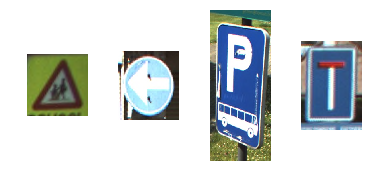

In [36]:
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [47]:
# Import the `transform` module from `skimage`
from skimage import transform
from skimage.color import rgb2gray
import numpy as np

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

# Convert `images28` to an array
images28 = np.array(images28)

print(images28.shape)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

print(images28.shape)

(4575, 28, 28, 3)
(4575, 28, 28)


## <div align="center">Modeling The Neural Network</div>

You can initialize the ***Graph*** with the help of ***Graph()***. You use this function to define the computation. Note that with the Graph, you don’t compute anything, because it doesn’t hold any values. It just ***defines the operations*** that you want to be running later.

In this case, you set up a default context with the help of ***as_default()***, which returns a context manager that makes this specific Graph the default graph. You use this method if you want to create multiple graphs in the same process: with this function, you have a global default graph to which all operations will be added if you don’t explicitly create a new graph.

* First, you define placeholders for inputs and labels because you won’t put in the “real” data yet. Remember that placeholders are values that are unassigned and that will be initialized by the session when you run it. So when you finally run the session, these placeholders will get the values of your dataset that you pass in the run() function!

* Then, you build up the network. You first start by flattening the input with the help of the flatten() function, which will give you an array of shape [None, 784] instead of the [None, 28, 28], which is the shape of your grayscale images.

* After you have flattened the input, you construct a fully connected layer that generates logits of size [None, 62]. Logits is the function operates on the unscaled output of previous layers, and that uses the relative scale to understand the units is linear.

In [49]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_1/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


In [60]:
tf.set_random_seed(1234)

# with tf.Session() as sess:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(201):
    _, loss_value = sess.run([train_op, loss], feed_dict={x: images28, y: labels})
    if i % 50 == 0:
        print("Loss: ", loss_value)

Loss:  4.221785
Loss:  2.80362
Loss:  2.3308008
Loss:  2.1081495
Loss:  1.970708


## <div align="center">Evaluating Neural Network</div>

[17, 12, 30, 34, 7, 14, 41, 24, 56, 13]
[17  1 32 34  7  7 40 32 56 13]


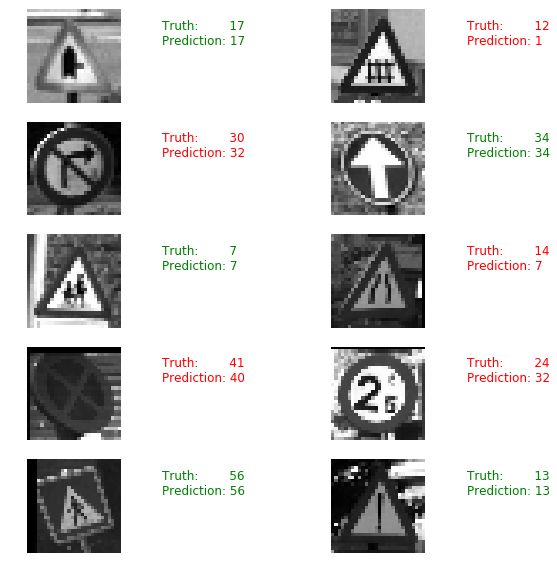

In [63]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

sess.close()